## Columbia University
### ECBM E4040 Neural Networks and Deep Learning. Fall 2019.

# Assignment 1, Task 3: Dimensionality Reduction

This task is devoted to dimensionality reduction. How to map high-dimensional data into low-dimensional space is an interesting topic in the machine learning field. It is related to another hot topic -- unsupervised learning. In this section, you are going to learn two different methods for this dimensionality reduction.

* Principal Component Analysis (PCA)
* t-Distributed Stochastic Neighbor Embedding (t-SNE) 

In [34]:
# Import modules
from __future__ import print_function
import tensorflow as tf
import numpy as np
import time
import matplotlib.pyplot as plt
from utils.cifar_utils import load_data

# Plot configurations
%matplotlib inline

# Notebook auto reloads code. (Ref: http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython)
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load Data

We will use the CIFAR-10 dataset.

In [49]:
# Load the raw CIFAR-10 data.
X_train, y_train, X_test, y_test = load_data()
X_train = X_train.reshape([50000,3,32,32]).transpose((0,2,3,1))
X_test = X_test.reshape([10000,3,32,32]).transpose((0,2,3,1))
# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

# Data organizations:
# Train data: 49000 samples from original train set: 1~49000
# Validation data: 1000 samples from original train set: 49000~50000
# Test data: 10000 samples from original test set: 1~10000
# Development data (for gradient check): 100 from the train set: 1~49000 #TODOTA is this 100 or 1000?
num_training = 49000
num_validation = 1000
num_dev = 100

X_val = X_train[-num_validation:]
y_val = y_train[-num_validation:]

mask = np.random.choice(num_training, num_dev, replace=False)
X_dev = X_train[mask]
y_dev = y_train[mask]

X_train = X_train[:num_training]
y_train = y_train[:num_training]

# Preprocessing: subtract the mean value across every dimension for training data
mean_image = np.mean(X_train, axis=0)

X_train = X_train.astype(np.float32) - mean_image.astype(np.float32)
X_val = X_val.astype(np.float32) - mean_image
X_test = X_test.astype(np.float32) - mean_image
X_dev = X_dev.astype(np.float32) - mean_image

print(X_train.shape, X_val.shape, X_test.shape, X_dev.shape)
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)
print('Development data shape:', X_dev.shape)
print('Development data shape', y_dev.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)
(49000, 32, 32, 3) (1000, 32, 32, 3) (10000, 32, 32, 3) (100, 32, 32, 3)
Train data shape:  (49000, 32, 32, 3)
Train labels shape:  (49000,)
Validation data shape:  (1000, 32, 32, 3)
Validation labels shape:  (1000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)
Development data shape: (100, 32, 32, 3)
Development data shape (100,)


## Part 1: Principal Component Analysis (PCA)

<span style="color:red"><strong>TODO</strong></span>: You have to complete the code in **./utils/features/pca.py**.

### Naive PCA

In [36]:
from utils.features.pca import pca_naive

X_patch = X_train[:,:,:,0]
X_patch = np.reshape(X_patch, (X_patch.shape[0], -1))

In [37]:
# Start PCA
K = 300
P, T = pca_naive(X_patch, K)

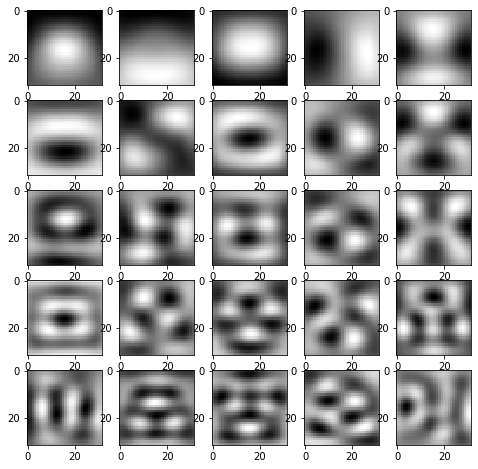

In [38]:
# Show principle components of P using a 5x5 subplot
# Visualize P
r = 5
f, axarr = plt.subplots(r, r, figsize=(8,8))
for i in range(r):
    for j in range(r):
        img = np.reshape(P[r*i+j], [32,32])
        axarr[i][j].imshow(img, cmap="gray")

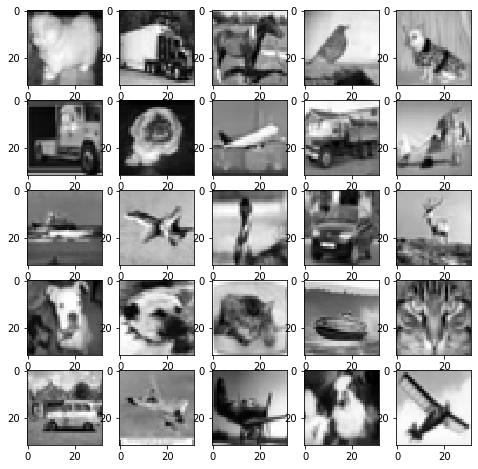

In [39]:
# Select a small set of images for test
num_training = 49000
num_pca = 25
mask = np.random.choice(num_training, num_pca, replace=False)
X_pca = X_train[mask,:,:,0]

# Visualize one channel of images 
r = 5
f, axarr = plt.subplots(r, r, figsize=(8,8))
for i in range(r):
    for j in range(r):
        img = X_pca[r*i+j]
        axarr[i][j].imshow(img, cmap="gray")

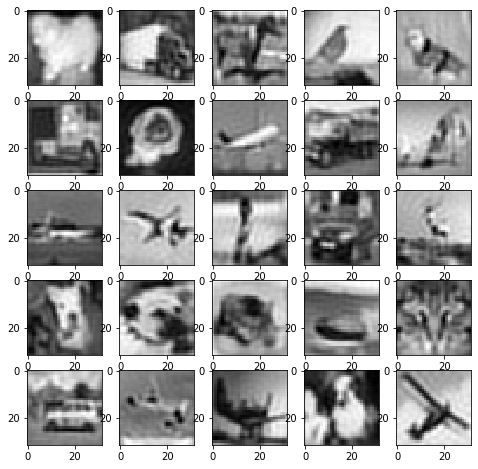

In [40]:
# Test your result
# Reduce dimension with P
X_features = []
for n in range(num_pca):
    img = X_pca[n]
    feature = np.dot(P, np.reshape(img, (-1,)))
    X_features.append(feature)

# Reconstruct image
X_recon = []
for n in range(num_pca):
    feature = X_features[n]
    img = np.reshape(np.dot(feature, P), (32,32))
    X_recon.append(img)

# Visualize results
r = 5
f, axarr = plt.subplots(r, r, figsize=(8,8))
for i in range(r):
    for j in range(r):
        img = X_recon[r*i+j]
        axarr[i][j].imshow(img, cmap="gray")

### PCA + Neural network

<span style="color:red"><strong>TODO</strong></span>: Use PCA to preprocess images before training a neural network: 

1. Do PCA preprocessing on each channel of the original image separately.
2. Stack PCA features from three channels into one vector, and use that vector as an input for MLP.
3. Train the MLP and show the results. 

In [48]:
from utils.train_funcs import train, test
from utils.classifiers.mlp import MLP

## TODO: pca preprocessing -> mlp classification

X_pch_a=X_train[:,:,:,0]
X_pch_a=np.reshape(X_pch_a,(X_pch_a.shape[0],-1))
X_pch_b=X_train[:,:,:,1]
X_pch_b=np.reshape(X_pch_b,(X_pch_b.shape[0],-1))
X_pch_c=X_train[:,:,:,2]
X_pch_c=np.reshape(X_pch_c,(X_pch_c.shape[0],-1))

# PCA & FEATURE
# P T F
K=1024
P_a,T_a=pca_naive(X_pch_a,K)
F_a=np.dot(P_a,X_pch_a.T)
P_b,T_b=pca_naive(X_pch_b,K)
F_b=np.dot(P_b,X_pch_b.T)
P_c,T_c=pca_naive(X_pch_c,K)
F_c=np.dot(P_c,X_pch_c.T)

# INTO ONE VEC
Xt=np.concatenate([F_a,F_b,F_c],axis=0).T

X1_val=Xt[-num_validation:]
y1_val=y_train[-num_validation:]
X1_train=Xt[:num_training]
y1_train=y_train[:num_training]
X1_test=Xt[:-num_validation]
y1_test=y_train[:-num_validation]
# have questions
print(X1_val.shape)
print(X1_train.shape)

(1000, 3072)
(49000, 3072)


<span style="color:red"><strong>TODO</strong></span>: Plot training, validation and test set accuracy.

number of batches for training: 98
5000/49000 loss: 2.3077680162313565
10000/49000 loss: 2.3076027919340625
15000/49000 loss: 2.3074097040796318
20000/49000 loss: 2.3071282562362176
25000/49000 loss: 2.3055555680536073
30000/49000 loss: 2.3048418956770766
35000/49000 loss: 2.292791100105585
40000/49000 loss: 2.271191569943259
45000/49000 loss: 2.251434240958488
epoch 1: valid acc = 0.165, new learning rate = 0.0095
5000/49000 loss: 2.2201028686513884
10000/49000 loss: 2.1959410241465216
15000/49000 loss: 2.21790139289389
20000/49000 loss: 2.185697056830616
25000/49000 loss: 2.162753155795002
30000/49000 loss: 2.190985124753685
35000/49000 loss: 2.194836021694923
40000/49000 loss: 2.184463398843312
45000/49000 loss: 2.18960932950321
epoch 2: valid acc = 0.177, new learning rate = 0.009025
5000/49000 loss: 2.1896141078180054
10000/49000 loss: 2.197985616741363
15000/49000 loss: 2.181030044561718
20000/49000 loss: 2.1786052531872544
25000/49000 loss: 2.169876037016544
30000/49000 loss: 2.

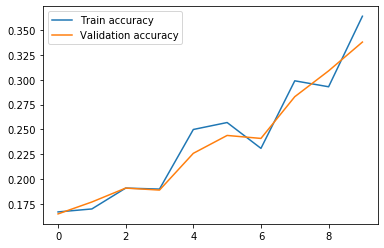

In [80]:
## TODO:
# plot the accuracy history
md=MLP(input_dim=3072,hidden_dims=[100,100],num_classes=10,reg=0.1,
       weight_scale=1e-3)
num_epoch=10
batch_size=500
lr=1e-2
verbose=True
train_acc_hist,val_acc_hist=train(md,X1_train,y1_train,X1_val,y1_val,
                                  num_epoch=num_epoch,batch_size=batch_size,learning_rate=lr,verbose=verbose)
test_acc=test(md,X1_test,y1_test)
plt.plot(train_acc_hist,label="Train accuracy")
plt.plot(val_acc_hist,label="Validation accuracy")
plt.legend()
plt.show()

## Part 2: t-SNE (optional, bonus +10 points)

t-SNE is is a machine learning algorithm for nonlinear dimensionality reduction developed by Geoffrey Hinton and Laurens van der Maaten. It is also a good way of visualizing high-dimensional data in 2D. We show its application for CIFAR10. Later it will be re-used in a CNN network. Experimenting with t-SNE can be fun. One thing to try is to visualize the output of each layer of MLP to observe the differences.

<p style="line-height: 1.2;">[1] Maaten, Laurens van der, and Geoffrey Hinton. "Visualizing data using t-SNE." Journal of Machine Learning Research 9.Nov (2008): 2579-2605.</p>
<p style="line-height: 1.2;">[2] Adaptive learning rate scheme by Jacobs https://www.willamette.edu/~gorr/classes/cs449/Momentum/deltabardelta.html</p>
<p style="line-height: 1.2;">[3] http://cs.stanford.edu/people/karpathy/cnnembed/</p>
<p style="line-height: 1.2;">[4] How to Use t-SNE Effectively, with examples.
 https://distill.pub/2016/misread-tsne</p>

In [43]:
from utils.features.tsne import tsne

#### tSNE of original data

In [83]:
random_select = np.random.choice(10000, 500, replace=False)
X = X_test[random_select,:,:,0].reshape(500,1024).astype('float')/255.0
tic = time.time()
Y = tsne(X, low_dim=2, perplexity=30.0)
print("it takes {} seconds".format(time.time()-tic))

2.530462065773757
The 100 th loop cost: 13.714684857209916, computation time: 4.683737516403198
The 200 th loop cost: 1.1320240449801617, computation time: 9.224303245544434
The 300 th loop cost: 1.1276985668007105, computation time: 13.750247240066528
The 400 th loop cost: 1.1276543589917691, computation time: 18.237661600112915
The 500 th loop cost: 1.1276542957793294, computation time: 22.853759765625
The 600 th loop cost: 1.127654295682066, computation time: 28.235472202301025
The 700 th loop cost: 1.127654295681883, computation time: 33.27167534828186
The 800 th loop cost: 1.1276542956818811, computation time: 38.25507593154907
The 900 th loop cost: 1.1276542956818805, computation time: 43.300742864608765
The 1000 th loop cost: 1.1276542956818807, computation time: 48.31086611747742
it takes 48.81449747085571 seconds


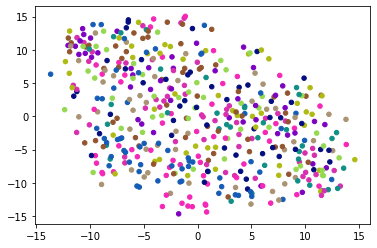

In [84]:
## visualize tSNE of original data
labels = y_test[random_select]
colors = np.random.rand(10,3)
color_labels = [colors[int(i)] for i in labels.tolist()]
plt.scatter(Y[:,0], Y[:,1], 20, color_labels)
plt.show()

#### tSNE of data after two hidden layers

Do visualization of the tSNE of data after going through MLP. In the visualization result, you should find that in comparison with the tSNE of original data where all data points mess up with each other. While the tSNE of data after two-layer networks would be shown as multiple clusters in a 2D panel.

In [85]:
# Define MLP model
model = MLP(input_dim=3072, hidden_dims=[100], num_classes=10, reg=0.1, weight_scale=1e-3)

num_epoch = 10
batch_size = 200
lr = 1e-3
verbose = False
train_acc_hist, val_acc_hist = train(model, X1_train, y1_train, X1_val, y1_val, 
                  num_epoch=num_epoch, batch_size=batch_size, learning_rate=lr, verbose=verbose)
test(model, X1_test, y1_test)

number of batches for training: 245
epoch 1: valid acc = 0.393, new learning rate = 0.00095
epoch 2: valid acc = 0.45, new learning rate = 0.0009025
epoch 3: valid acc = 0.47, new learning rate = 0.000857375
epoch 4: valid acc = 0.477, new learning rate = 0.0008145062499999999
epoch 5: valid acc = 0.53, new learning rate = 0.0007737809374999998
epoch 6: valid acc = 0.554, new learning rate = 0.0007350918906249997
epoch 7: valid acc = 0.563, new learning rate = 0.0006983372960937497
epoch 8: valid acc = 0.572, new learning rate = 0.0006634204312890621
epoch 9: valid acc = 0.576, new learning rate = 0.000630249409724609
epoch 10: valid acc = 0.579, new learning rate = 0.0005987369392383785
test acc: 0.5807083333333334


0.5807083333333334

<span style="color:red"><strong>TODO</strong></span>: Do visualization of the tSNE of data after going through MLP. 

In [86]:
# run tSNE
X = X1_test[random_select]
tic = time.time()
# TODO:
# You need to first go through two hidden layers.
X=model.layers[1].feedforward(model.layers[0].feedforward(X))
X=np.exp(X)/np.tile(np.sum(np.exp(X),axis=1,keepdims=True),10)
y=tsne(X,low_dim=2,perplexity=20.0)
# End TODO
print("it takes {} seconds".format(time.time()-tic))

0.15924519142219373
The 100 th loop cost: 11.862561719060928, computation time: 4.716493129730225
The 200 th loop cost: 0.6040919713066174, computation time: 9.332327842712402
The 300 th loop cost: 0.5714732025971476, computation time: 14.457374572753906
The 400 th loop cost: 0.5653044152675744, computation time: 20.294442176818848
The 500 th loop cost: 0.5630209221448197, computation time: 25.146783590316772
The 600 th loop cost: 0.557206401663729, computation time: 29.979350090026855
The 700 th loop cost: 0.5474501221095804, computation time: 34.87373161315918
The 800 th loop cost: 0.5457996290203776, computation time: 39.65625619888306
The 900 th loop cost: 0.5450415037269266, computation time: 44.45488381385803
The 1000 th loop cost: 0.5446837738009462, computation time: 51.690070152282715
it takes 52.28697466850281 seconds


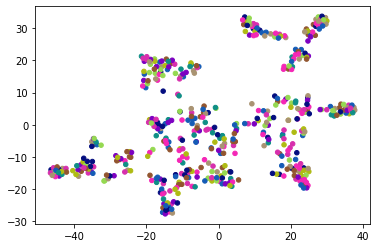

In [87]:
# TODO:
# visualize tSNE 2D representation of data after two hidden layers
# labels = y_test[random_select]
# colors = np.random.rand(10,3)
# color_labels = [colors[int(i)] for i in labels.tolist()]
plt.scatter(y[:,0],y[:,1],20,color_labels)
plt.show()

<span style="color:red"><strong>TODO</strong></span>: Try tuning the parameters of tSNE, do visualization of the new tSNE of data.

In [88]:
# TODO:
# Tune the parameter, show the results.
# run tSNE

# X = X1_test[random_select]
# tic = time.time()
# X=model.layers[1].feedforward(model.layers[0].feedforward(X))
# X=np.exp(X)/np.tile(np.sum(np.exp(X),axis=1,keepdims=True),10)
y=tsne(X,low_dim=5,perplexity=50.0)


print("it takes {} seconds".format(time.time()-tic))

0.2505286403675966
The 100 th loop cost: 10.721079309463963, computation time: 4.961632251739502
The 200 th loop cost: 0.35767171124375763, computation time: 10.80133843421936
The 300 th loop cost: 0.34469282114831673, computation time: 16.205822706222534
The 400 th loop cost: 0.3412205914716096, computation time: 21.31268072128296
The 500 th loop cost: 0.33989982638071536, computation time: 27.282616138458252
The 600 th loop cost: 0.3391664057422585, computation time: 33.001606464385986
The 700 th loop cost: 0.33868942753336556, computation time: 38.847728967666626
The 800 th loop cost: 0.3383511308271853, computation time: 45.19197678565979
The 900 th loop cost: 0.3380977065665382, computation time: 51.32748293876648
The 1000 th loop cost: 0.33789787414563766, computation time: 60.03629541397095
it takes 186.6538953781128 seconds


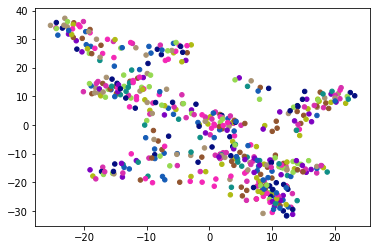

In [89]:
# TODO:
# visualize tSNE 2D representation of data after two hidden layers
# labels = y_test[random_select]
# colors = np.random.rand(10,3)
# color_labels = [colors[int(i)] for i in labels.tolist()]
plt.scatter(y[:,0],y[:,1],20,color_labels)
plt.show()